1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
from math import sqrt, pi, erf
from scipy import stats
from scipy import optimize

mu = 6.3
x = 15.
sigma = 3.

probability = 1-poisson.cdf(k=15., mu=6.3)

print("Probability that in a single year are observed 15 or more hurricances : {}".format(probability))

Z = abs(x - mu) / sigma

print("Z value is ", Z)


pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print("p-value =", pvalue)


Probability that in a single year are observed 15 or more hurricances : 0.0008444930803583883
Z value is  2.9
p-value = 0.0037316266007680825


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [ ]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

pre_mean = np.mean(pre)
post_mean = np.mean(post)

n = len(pre)

variance_pre=np.var(pre,ddof=1)
variance_post=np.var(post,ddof=1)

sigma_pre = variance_pre**(1/2)
sigma_post = variance_post**(1/2)
sigma = ((sigma_pre**2 + sigma_post**2)/2)**(1/2)



T = (pre_mean - post_mean) / (sigma *((2/n)**(1/2)))
print("T value found as : ",T)

plt.figure()
plt.plot(range(1,11), pre, 'bo')
plt.plot(range(1,11), post, 'ro')
plt.show()



pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value found as", pvalue)


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
from scipy import optimize

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
plt.plot(months, temp_max, 'p')
plt.plot(months, temp_min, 'p')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
 
def yearly_temps(a, b, c, d):
    op= c * np.cos(1/2*a)*4+ d*8 * np.pi - b
    return op

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [0, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'o')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'o')
plt.plot(days, yearly_temps(days, *res_min), 'r-')
plt.xlabel('Month')
plt.ylabel('Temperature in C)')

plt.show()

print("plot works with high accuracy rate for most of the months.")



4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

--2023-01-19 15:43:50--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'www.dropbox.com'


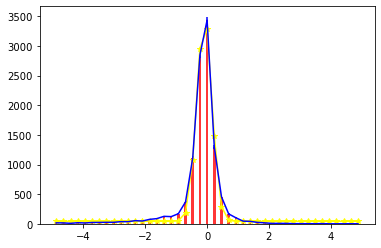

In [16]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

import math
import pandas as pd

residuals = np.load('data/residuals_261.pkl', allow_pickle=True)
df=pd.DataFrame(residuals.item())
plt.figure()

n, bins, patches = plt.hist(df['residuals'], bins=43, color='red', alpha=0.79, rwidth=0.35, range = (-5,5))

bin_cntr = (bins[:-1] + bins[1:]) / (2.0) 
sigma = np.sqrt(np.abs(n))
plt.errorbar(x = bin_cntr, y = n, yerr= np.sqrt(np.abs(n)), color="blue")

def ret(x, a, b, c, d):
     return a*np.exp(-(x-b)**2/(2*c**2))+d

params, cov = curve_fit(ret, bin_cntr, n)
fitted_gaussian = ret(bin_cntr, *params)
plt.plot(bin_cntr, ret(bin_cntr, *params), marker='*',color='yellow')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

--2023-01-19 15:15:52--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-19 15:15:52--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9dad028b1677d154b96d3ea10b.dl.dropboxusercontent.com/cd/0/inline/B002nKLdcK0iQK2GK2hfalcnMTDgovUfgzZ0XnjkilBBLfvjG0eNo0WklO2hwK0tC6BIDPDxsay8JsKRN264hse6q47gxi69h9ryZMzse-0aP_jBhRPUpspOFcYEh8n2IDZBzvUIidSUzH4PY-J_7iaSSRVyVwd7Olq2f7lRhLoqfg/file# [following]
--2023-01-19 15:15:53--  https://uc9dad028b1677d154b96d3ea10b.dl.dropboxusercontent.com/cd/0/inline/B002nKL

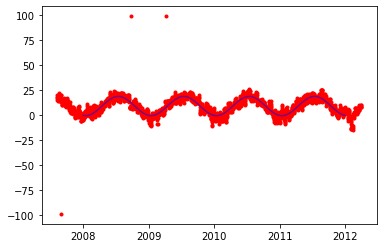

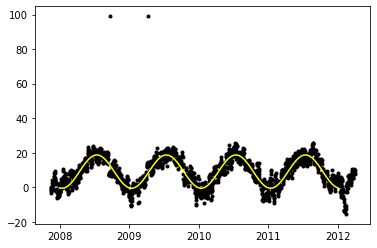

In [4]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt


date,temperature = np.loadtxt('/Users/demo/ScientificComputingWithPython2022/munich_temperatures_average_with_bad_data.txt', unpack=True)


def ft(t, a, b, c):
    f=a * np.cos(2 * np.pi * t + b) + c
    return f
popt, pcov = curve_fit(ft, date, temperature)
plt.figure()
plt.plot(date[4600:6300], temperature[4600:6300], '.',color='red')
xend = np.linspace(2008, 2012, 100)
plt.plot(xend, ft(xend, *popt), color='purple')


def gx(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

popt, pcov = curve_fit(gx, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.',color='black')
xend = np.linspace(2008, 2012, 100)
plt.plot(xend, gx(xend, *popt), color='yellow')